In [1]:
import pandas as pd 

house_data = pd.read_csv("HousePricePrediction.csv")

In [2]:
house_data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [3]:
house_data.head()  

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [4]:
# Dataset shape
print("Shape:", house_data.shape)


Shape: (2919, 13)


In [5]:
#Check dataset information and missing values
house_data.info()
house_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [6]:
#Replace missing SalePrice values with mean SalePrice
house_data['SalePrice'] = house_data['SalePrice'].fillna(
    house_data['SalePrice'].mean()
)


In [7]:
#Handle remaining missing values

# Numerical columns -> Mean
num_cols = house_data.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    house_data[col] = house_data[col].fillna(house_data[col].mean())


# Categorical columns -> Mode
cat_cols = house_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    house_data[col] = house_data[col].fillna(house_data[col].mode()[0])


In [8]:
#Drop unnecessary column
house_data.drop('Id', axis=1, inplace=True)

In [9]:
#Encode categorical variables
house_data = pd.get_dummies(house_data, drop_first=True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
#Split features and target
X = house_data.drop('SalePrice', axis=1)
y = house_data['SalePrice']

In [12]:
X.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,20,9600,8,1976,1976,0.0,1262.0,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,60,11250,5,2001,2002,0.0,920.0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,70,9550,5,1915,1970,0.0,756.0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,60,14260,5,2000,2000,0.0,1145.0,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [13]:
y.head() 

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [14]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [15]:
X_train.head() 

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
2650,160,2179,5,1976,1976,0.0,855.0,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1709,20,7500,5,2006,2007,0.0,1372.0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
869,60,9938,5,1993,1994,0.0,1050.0,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2355,20,12450,5,2003,2004,0.0,1094.0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2914,160,1936,7,1970,1970,0.0,546.0,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [16]:
#Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
#Make predictions
y_pred = model.predict(X_test)

In [18]:
y_pred

array([169027.28628615, 185904.07191173, 152864.76648552, 188043.66315575,
       202283.45922509, 229915.81367668, 134760.22232694, 202071.47747825,
       127559.5272353 , 182196.2317109 , 166808.30037675, 188507.65618773,
       180688.47711483, 192065.81140601, 192361.42960303, 197689.13877474,
       163624.28019706, 206488.24128788, 147362.22915194, 169507.02180824,
       205220.85339774, 147502.63720125, 135353.23528023, 205851.09796552,
       191911.02373097, 197597.09574545, 191952.59301751, 152578.36421329,
       186154.53704076, 168919.37708053, 216566.91634311, 155515.60027148,
       201259.90531236, 195227.41531073, 196125.08321968, 205616.74742003,
       163538.23447654, 167134.47319108, 157905.89313362, 164722.9046943 ,
       134395.61523715, 195409.32220108, 219497.16783822, 183350.02321912,
       177126.54814448, 187837.99464963, 190754.36753031, 185359.90310272,
       196921.54301448, 224412.27219035, 153283.30971972, 165161.1861756 ,
       150393.4106699 , 1

In [19]:
y_test

2437    180921.19589
2470    180921.19589
2359    180921.19589
789     187500.00000
1642    180921.19589
            ...     
2880    180921.19589
2295    180921.19589
2222    180921.19589
1090     92900.00000
542     213250.00000
Name: SalePrice, Length: 584, dtype: float64

In [20]:
#Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)

Mean Absolute Error (MAE): 32777.022903203004
Mean Squared Error (MSE): 2368321830.0715923
R-squared Score: 0.3359926257926066


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

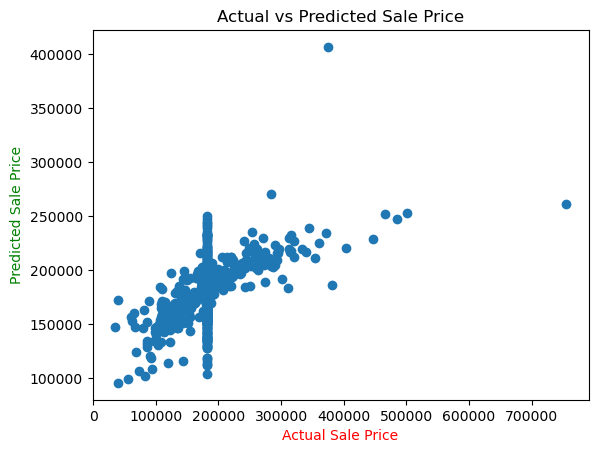

In [23]:
#Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sale Price", color='red')
plt.ylabel("Predicted Sale Price", color = "green")
plt.title("Actual vs Predicted Sale Price")
plt.show()